### Importing Data

In [1]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import data

data= pd.read_csv('QVI_data.csv')
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
data['DATE']=pd.to_datetime(data['DATE'],yearfirst=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
LYLTY_CARD_NBR      264834 non-null int64
DATE                264834 non-null datetime64[ns]
STORE_NBR           264834 non-null int64
TXN_ID              264834 non-null int64
PROD_NBR            264834 non-null int64
PROD_NAME           264834 non-null object
PROD_QTY            264834 non-null int64
TOT_SALES           264834 non-null float64
PACK_SIZE           264834 non-null int64
BRAND               264834 non-null object
LIFESTAGE           264834 non-null object
PREMIUM_CUSTOMER    264834 non-null object
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


### Finding Total Sales,Total Customers and Avg Transaction per Customer (Monthly)

In [5]:
## Get Total sales of each store month-wise
def AVG_TRANS_PER_CUSTOMER(x):
    y=np.divide(x.groupby('LYLTY_CARD_NBR')['PROD_QTY'].sum().sum(),x.groupby('LYLTY_CARD_NBR')['PROD_QTY'].sum().shape[0])
    
    return np.round(y,2)

TOTAL_SALES=[]
TOTAL_CUSTOMERS=[]
AVG_TRANS_PER_CUST=[]
for i in range(1,273):
    data_ar=data[data['STORE_NBR'] == i]
    data_ar=data_ar.set_index('DATE')
    TOTAL_SALES.append(data_ar.resample('M')['TOT_SALES'].sum())
    TOTAL_CUSTOMERS.append(data_ar.resample('M')['LYLTY_CARD_NBR'].count())
    AVG_TRANS_PER_CUST.append(data_ar.resample('M').apply(AVG_TRANS_PER_CUSTOMER))
    

C:\Users\ACER M5\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
def form_df(list1,list2,list3):
    
    dict1={}
    dict2={}
    dict3={}
    dicts=[dict1,dict2,dict3]
    
    lists=[list1,list2,list3]
    
    for l,d in zip(lists,dicts):
        for i,j in zip(l,range(1,273)):
            d[j]=i
    
    dfs=[]
    
    for d in dicts:
        df=pd.DataFrame.from_dict(d).T
        dfs.append(df)
    return dfs

In [7]:
list1=form_df(TOTAL_SALES,TOTAL_CUSTOMERS,AVG_TRANS_PER_CUST)

In [8]:
TOT_SALES_DF=list1[0]
TOTAL_CUSTOMERS_DF=list1[1]
AVG_TRANS_PER_CUST_DF=list1[2]

In [9]:
# Sales per month
TOT_SALES_DF.columns=['S/M{}'.format(i) for i in range(1,13)]  

#Total customers per month
TOTAL_CUSTOMERS_DF.columns=['TC/M{}'.format(i) for i in range(1,13)]

#Avg transctions per customer per month
AVG_TRANS_PER_CUST_DF.columns=['AT/C/M{}'.format(i) for i in range(1,13)]

In [10]:
# form one dataframe
Total_df=pd.concat([TOT_SALES_DF,TOTAL_CUSTOMERS_DF],axis=1)
Total_df=pd.concat([Total_df,AVG_TRANS_PER_CUST_DF],axis=1)
Total_df.index=list(range(1,273))

In [11]:
Total_df.head()

,S/M1,S/M2,S/M3,S/M4,S/M5,S/M6,S/M7,S/M8,S/M9,S/M10,...,AT/C/M3,AT/C/M4,AT/C/M5,AT/C/M6,AT/C/M7,AT/C/M8,AT/C/M9,AT/C/M10,AT/C/M11,AT/C/M12
1,206.9,176.10,278.8,188.1,192.6,189.6,154.8,225.4,192.9,192.9,...,1.27,1.32,1.24,1.36,1.20,1.25,1.29,1.36,1.43,1.26
2,150.8,193.80,154.4,167.8,162.9,136.0,162.8,139.4,192.1,196.5,...,1.14,1.10,1.13,1.14,1.14,1.28,1.19,1.19,1.17,1.10
3,1205.7,1079.75,1021.5,1037.9,1008.0,1121.6,1051.7,1197.7,1124.4,920.0,...,2.27,2.26,2.25,2.30,2.31,2.34,2.34,2.30,2.17,2.27
4,1399.9,1259.50,1198.6,1346.4,1212.0,1185.6,1525.0,883.4,1192.4,1230.5,...,2.32,2.52,2.36,2.56,2.50,2.24,2.29,2.35,2.17,2.27
5,812.0,745.10,896.0,798.0,771.4,879.2,838.0,727.0,681.4,721.8,...,2.48,2.43,2.61,2.63,2.57,2.44,2.37,2.53,2.39,2.49


### Finding Control and Trial Pairs

In [12]:
#indicate trial and control stores from total_df
Trial_Stores=Total_df.iloc[[76,85,87]]
Control_Stores=Total_df.drop(index=[77,86,88])

In [13]:
Control_Stores.head()

,S/M1,S/M2,S/M3,S/M4,S/M5,S/M6,S/M7,S/M8,S/M9,S/M10,...,AT/C/M3,AT/C/M4,AT/C/M5,AT/C/M6,AT/C/M7,AT/C/M8,AT/C/M9,AT/C/M10,AT/C/M11,AT/C/M12
1,206.9,176.10,278.8,188.1,192.6,189.6,154.8,225.4,192.9,192.9,...,1.27,1.32,1.24,1.36,1.20,1.25,1.29,1.36,1.43,1.26
2,150.8,193.80,154.4,167.8,162.9,136.0,162.8,139.4,192.1,196.5,...,1.14,1.10,1.13,1.14,1.14,1.28,1.19,1.19,1.17,1.10
3,1205.7,1079.75,1021.5,1037.9,1008.0,1121.6,1051.7,1197.7,1124.4,920.0,...,2.27,2.26,2.25,2.30,2.31,2.34,2.34,2.30,2.17,2.27
4,1399.9,1259.50,1198.6,1346.4,1212.0,1185.6,1525.0,883.4,1192.4,1230.5,...,2.32,2.52,2.36,2.56,2.50,2.24,2.29,2.35,2.17,2.27
5,812.0,745.10,896.0,798.0,771.4,879.2,838.0,727.0,681.4,721.8,...,2.48,2.43,2.61,2.63,2.57,2.44,2.37,2.53,2.39,2.49


In [14]:
#Calculate Pearson Correlation

def calculate_pearson(int_var):
    pearson_coef=[]
    for i in Control_Stores.index:
        x_arr=np.corrcoef(Trial_Stores.iloc[int_var],Control_Stores[Control_Stores.index == i])
        pearson_coef.append(x_arr[0,1])
    
    return pearson_coef
    

In [16]:
ControlStores=[]
    
for j in range(0,3):
    ControlStores.append(calculate_pearson(j))


In [17]:
Control_Store_1=ControlStores[0]
Control_Store_2=ControlStores[1]
Control_Store_3=ControlStores[2]

In [18]:
Control1=calculate_pearson(0).index(max(calculate_pearson(0)))
Control2=calculate_pearson(1).index(max(calculate_pearson(1)))
Control3=calculate_pearson(2).index(max(calculate_pearson(2)))

In [19]:
Control_Stores['Control_Store_1'] =Control_Store_1
Control_Stores['Control_Store_2'] =Control_Store_2
Control_Stores['Control_Store_3'] =Control_Store_3

### Visualizing Sales,Customers and Per Customer Transaction of Each pair

In [92]:
def comparison_visualization(trial,control,sales_months,customers_months,transaction_months,*p_values):

    #unpacking p_values
    pvalues=[]
    for p in p_values:
        pvalues.append(p)
    #Set canvas
    sns.set(style='white')

    #Create figure and axes
    fig,axes=plt.subplots(3,1,figsize=(10,12))

    #Create first plot
    axes[0].plot(Control_Stores.iloc[control,sales_months],color='red')
    axes[0].plot(Trial_Stores.iloc[trial,sales_months],color='blue')

    #first x-axes
    axes[0].set_xlabel("Total Sales", fontsize = 12, fontweight = "semibold")
    
    if p_values:
        axes[0].text(1.5,max(Control_Stores.iloc[control,sales_months]),'P_Value {}'.format(pvalues[0]))
    


    #Create Second plot
    axes[1].plot(Control_Stores.iloc[control,customers_months],color='red')
    axes[1].plot(Trial_Stores.iloc[trial,customers_months],color='blue')
    

    #Second axes
    axes[1].set_xlabel("Total Customer", fontsize = 12, fontweight = "semibold")
    
    if p_values:
        axes[1].text(1.5,max(Control_Stores.iloc[control,customers_months]),'P_Value {}'.format(pvalues[1]))

    #Create third plot
    axes[2].plot(Control_Stores.iloc[control,transaction_months],color='red')
    axes[2].plot(Trial_Stores.iloc[trial,transaction_months],color='blue')

    #first x-axes
    axes[2].set_xlabel("AVG Transaction/Customer", fontsize = 12, fontweight = "semibold")
    
    if p_values:
        axes[2].text(1.5,max(Control_Stores.iloc[control,transaction_months]),'P_Value {}'.format(pvalues[2]))

    # Despine visualizations
    sns.despine(left = True)
    # Figure final formatting   
    fig.suptitle('Comparison of Trial Store {} and Control Store {}'.format(trial
                                                                                                         ,control +1), 
                 fontsize = 14, fontweight = "semibold")
    plt.show()


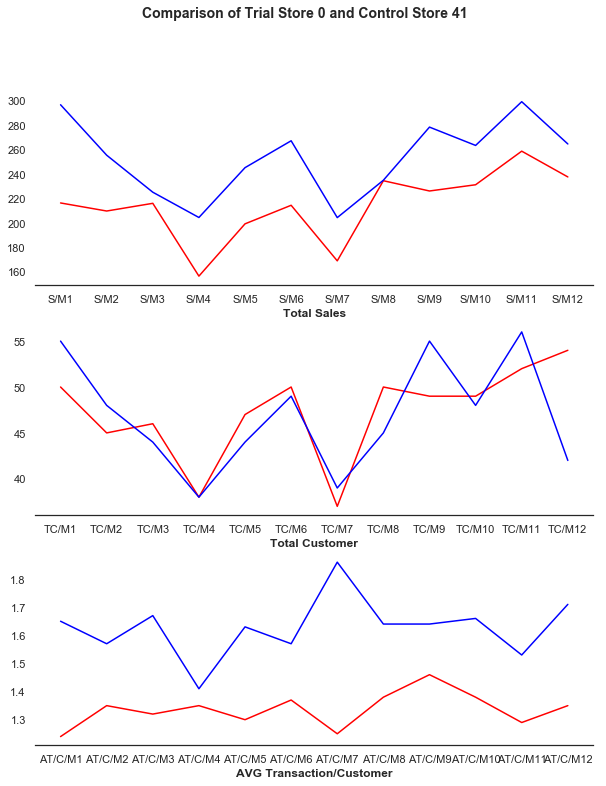

In [93]:
# first trial loc and second control location index
comparison_visualization(0,Control1,list(range(0,12)),list(range(12,24)),list(range(24,36)))

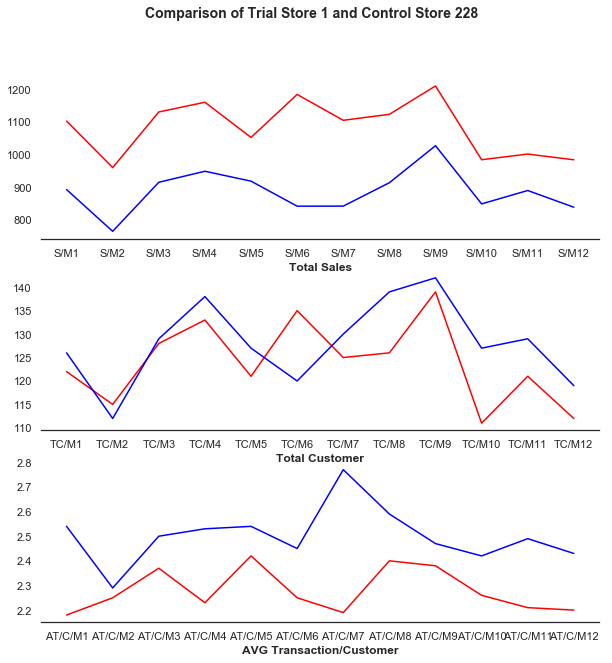

In [44]:
comparison_visualization(1,Control2,list(range(0,12)),list(range(12,24)),list(range(24,36)))

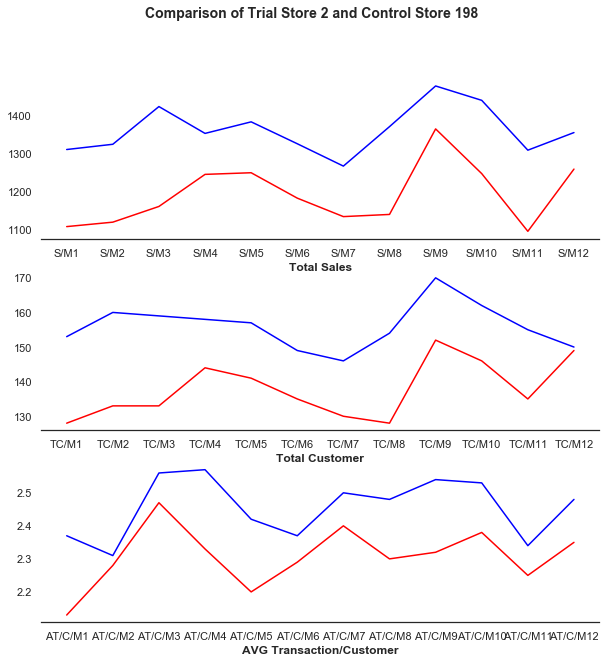

In [45]:
comparison_visualization(2,Control3,list(range(0,12)),list(range(12,24)),list(range(24,36)))

### Assessing Sales of Trial Stores during Trial Period  (Feb,Mar,Apr : 2019) with Control Stores

__1.Checking if there is statistically significant difference bwteen Sales during Trial Period__

In [46]:
from scipy.stats import ttest_ind

def Assessing_Significance(C1,C2,C3):
    
    Control_list=[C1,C2,C3]
    p_values_sales=[]
    p_values_customers=[]
    p_values_transactions=[]
    
    for c,d in zip(Control_list,range(0,3)):
        x_arr=ttest_ind(Trial_Stores.iloc[d,list(range(7,10))],Control_Stores.iloc[c,list(range(7,10))])
        p_values_sales.append(x_arr)
    
    for c,d in zip(Control_list,range(0,3)):
        x_arr=ttest_ind(Trial_Stores.iloc[d,list(range(19,22))],Control_Stores.iloc[c,list(range(19,22))])
        p_values_customers.append(x_arr)
                        
                        
    for c,d in zip(Control_list,range(0,3)):
        x_arr=ttest_ind(Trial_Stores.iloc[d,list(range(31,34))],Control_Stores.iloc[c,list(range(31,34))])
        p_values_transactions.append(x_arr)
                        
    return p_values_customers,p_values_sales,p_values_transactions
    

In [48]:
sales_p_values,customer_p_values,transactions_p_values=Assessing_Significance(Control1,Control2,Control3)

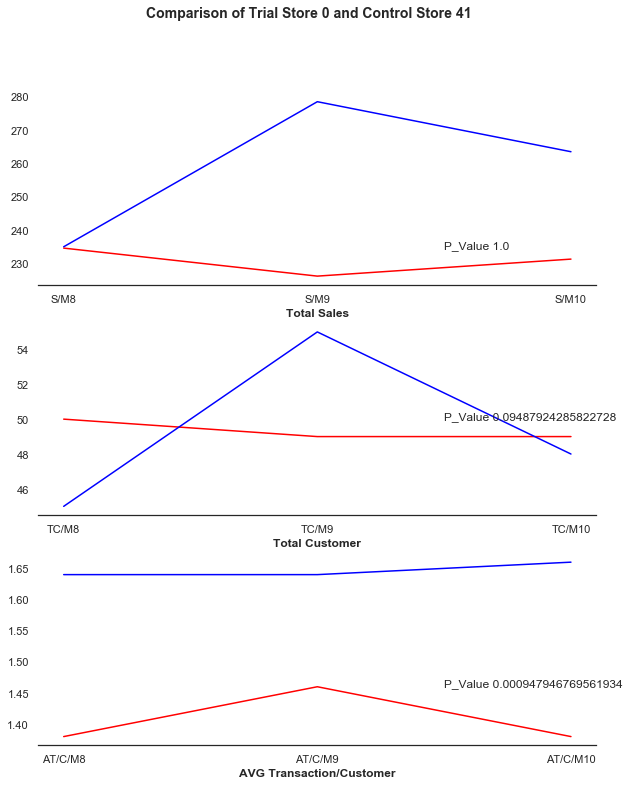

In [94]:
# Trail pair 1 during Trial period

comparison_visualization(0,Control1,list(range(7,10)),list(range(19,22)),list(range(31,34)),
                         sales_p_values[0][1],customer_p_values[0][1],transactions_p_values[0][1])

___For 95% CI, We can see that AVG Transaction Per Customer has significantly changed during trial period for Store 77___

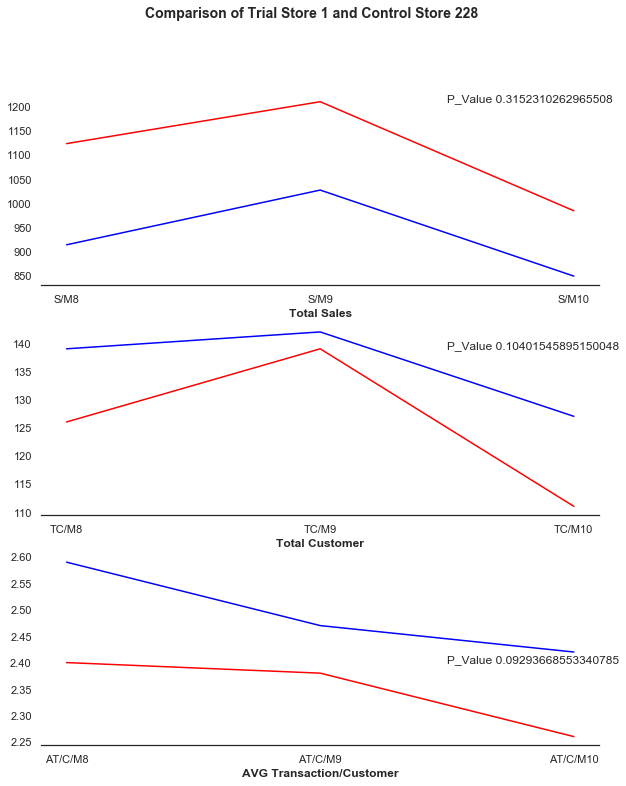

In [95]:
# Trail pair 2 during Trial period

comparison_visualization(1,Control2,list(range(7,10)),list(range(19,22)),list(range(31,34)),
                         sales_p_values[1][1],customer_p_values[1][1],transactions_p_values[1][1])

___for 90% CI, We can see that sales and total customers have not significantly changed during trial period for Store 86___

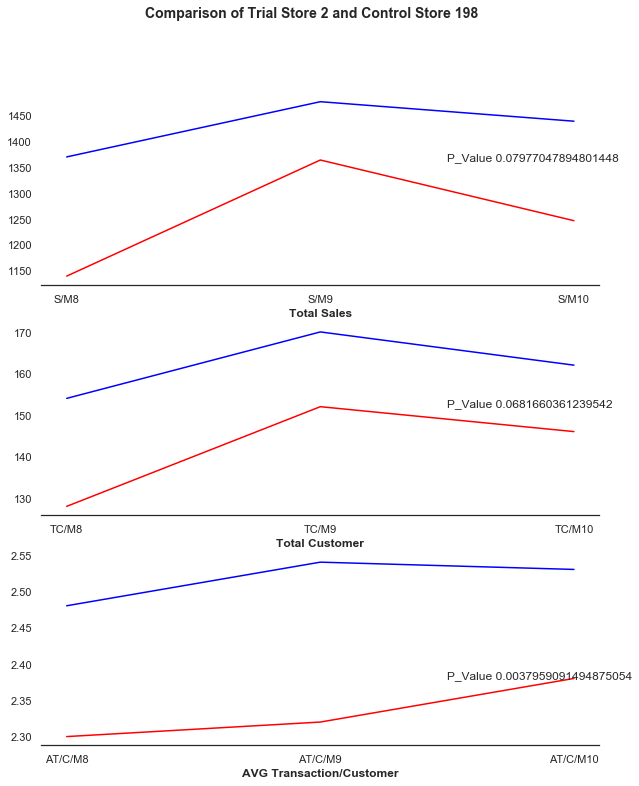

In [97]:
comparison_visualization(2,Control3,list(range(7,10)),list(range(19,22)),list(range(31,34)),
                         sales_p_values[2][1],customer_p_values[2][1],transactions_p_values[2][1])

__For 90% CI: Sales, Customers and Average Transactions all have changed during trial period__

__For 95% CI: Only AVG Transaction/Customer has changed__ 